In [559]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch 
from torch import nn
from sklearn.datasets import make_moons

In [560]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

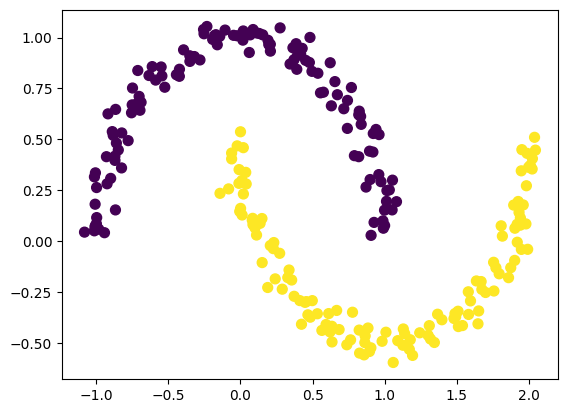

In [561]:
plt.scatter(X[:,0], X[:,1], c=y, s=50)
plt.show()

In [562]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [563]:
class vanish_moons(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=2, out_features=10),  # linear layer
            nn.Sigmoid(),                # Sigmoid activation
            nn.Linear(in_features=10, out_features=10),
            nn.Sigmoid(),
            nn.Linear(in_features=10, out_features=10),
            nn.Sigmoid(),
            nn.Linear(in_features=10, out_features=10),
            nn.Sigmoid(),
            nn.Linear(in_features=10, out_features=10),
            nn.Sigmoid(),
            nn.Linear(in_features=10, out_features=10),
            nn.Sigmoid(),
            nn.Linear(in_features=10, out_features=10),
            nn.Sigmoid(),
            nn.Linear(in_features=10, out_features=10),
            nn.Sigmoid(),
            nn.Linear(in_features=10, out_features=10),
            nn.Sigmoid(),
            nn.Linear(in_features=10, out_features=1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.linear_layer_stack(x)
model = vanish_moons().to(device)

In [564]:
model

vanish_moons(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=10, out_features=10, bias=True)
    (9): Sigmoid()
    (10): Linear(in_features=10, out_features=10, bias=True)
    (11): Sigmoid()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): Sigmoid()
    (14): Linear(in_features=10, out_features=10, bias=True)
    (15): Sigmoid()
    (16): Linear(in_features=10, out_features=10, bias=True)
    (17): Sigmoid()
    (18): Linear(in_features=10, out_features=1, bias=True)
    (19): Sigmoid()
  )
)

In [565]:
model.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[-0.1055,  0.3758],
                      [-0.6117,  0.0313],
                      [-0.6245, -0.3084],
                      [-0.6487, -0.5499],
                      [-0.5140, -0.4637],
                      [-0.6206,  0.1912],
                      [ 0.5976, -0.4551],
                      [ 0.5572,  0.2308],
                      [ 0.6998,  0.0802],
                      [ 0.4999,  0.1747]])),
             ('linear_layer_stack.0.bias',
              tensor([ 0.4427, -0.6714,  0.4675, -0.2824, -0.0870,  0.1642,  0.5535, -0.3940,
                      -0.6643,  0.1603])),
             ('linear_layer_stack.2.weight',
              tensor([[ 4.3586e-02,  2.0959e-01,  5.6055e-02, -2.3259e-02,  1.0207e-01,
                       -1.5291e-01, -3.4620e-02,  2.2078e-01,  1.6691e-01, -2.4545e-01],
                      [-5.0699e-02, -1.4938e-01, -2.2137e-01, -2.1350e-01, -9.7881e-02,
                       -1.1658e-01, -2.344

In [566]:
total_params = sum(
	param.numel() for param in model.parameters()
)
total_params

921

In [567]:
# loss_fc and optimizer
loss_fc = nn.BCELoss() 

optimizer = torch.optim.Adam(params = model.parameters(),
                            lr = 0.001)

In [568]:
model.linear_layer_stack[0].weight

Parameter containing:
tensor([[-0.1055,  0.3758],
        [-0.6117,  0.0313],
        [-0.6245, -0.3084],
        [-0.6487, -0.5499],
        [-0.5140, -0.4637],
        [-0.6206,  0.1912],
        [ 0.5976, -0.4551],
        [ 0.5572,  0.2308],
        [ 0.6998,  0.0802],
        [ 0.4999,  0.1747]], requires_grad=True)

In [569]:
old_weights = model.linear_layer_stack[0].weight.clone()

In [570]:
old_weights

tensor([[-0.1055,  0.3758],
        [-0.6117,  0.0313],
        [-0.6245, -0.3084],
        [-0.6487, -0.5499],
        [-0.5140, -0.4637],
        [-0.6206,  0.1912],
        [ 0.5976, -0.4551],
        [ 0.5572,  0.2308],
        [ 0.6998,  0.0802],
        [ 0.4999,  0.1747]], grad_fn=<CloneBackward0>)

In [571]:
old_weight1 = old_weights
old_weight1

tensor([[-0.1055,  0.3758],
        [-0.6117,  0.0313],
        [-0.6245, -0.3084],
        [-0.6487, -0.5499],
        [-0.5140, -0.4637],
        [-0.6206,  0.1912],
        [ 0.5976, -0.4551],
        [ 0.5572,  0.2308],
        [ 0.6998,  0.0802],
        [ 0.4999,  0.1747]], grad_fn=<CloneBackward0>)

In [572]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [573]:
from sklearn.model_selection import train_test_split

In [574]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [575]:
X_train

tensor([[ 1.0314e+00,  2.5272e-01],
        [ 3.7177e-01, -2.6884e-01],
        [ 1.6678e+00, -1.9664e-01],
        [-8.6563e-01,  6.4756e-01],
        [ 2.4050e-01, -1.8347e-01],
        [ 2.0233e+00,  4.0624e-01],
        [ 1.1264e-01,  1.0224e+00],
        [-1.0128e+00,  5.2073e-02],
        [ 8.6187e-01, -4.9583e-01],
        [ 2.2774e-01, -3.5230e-02],
        [-9.1827e-01,  6.2567e-01],
        [ 8.2524e-01,  6.2128e-01],
        [-3.9455e-01,  9.3951e-01],
        [ 5.6410e-01, -4.3606e-01],
        [ 6.3436e-01, -4.9270e-01],
        [ 1.0049e-01,  6.6964e-02],
        [-9.2918e-01,  4.1562e-01],
        [ 2.3086e-01, -5.3819e-03],
        [-1.0792e-02,  2.8502e-01],
        [-8.6667e-01,  1.5462e-01],
        [-3.5069e-01,  8.8288e-01],
        [ 8.2267e-01, -4.3457e-01],
        [ 9.0516e-01,  2.9955e-02],
        [-4.2379e-01,  8.0979e-01],
        [-2.3284e-01,  1.0541e+00],
        [ 1.0586e+00, -5.9340e-01],
        [-1.0057e+00,  7.7405e-02],
        [ 1.1766e+00, -4.820

In [576]:
epochs = 100

for epoch in range(epochs):

  model.train()

  # forward pass
  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss/accuarcy
  loss = loss_fc(y_logits, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step (perform gradient descent)
  optimizer.step()

  # testing
  model.eval()
  with torch.inference_mode():

    # forward pass
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss/accuarcy
    test_loss = loss_fc(test_logits, y_test)


# lets print out what is happening
    if epoch % 5 == 0:
        print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 0.6934722661972046
Epoch: 5 | Loss: 0.6930059790611267
Epoch: 10 | Loss: 0.6929632425308228
Epoch: 15 | Loss: 0.6930064558982849
Epoch: 20 | Loss: 0.6929680705070496
Epoch: 25 | Loss: 0.6929474472999573
Epoch: 30 | Loss: 0.6929576992988586
Epoch: 35 | Loss: 0.6929534077644348
Epoch: 40 | Loss: 0.6929471492767334
Epoch: 45 | Loss: 0.6929494738578796
Epoch: 50 | Loss: 0.6929484009742737
Epoch: 55 | Loss: 0.6929471492767334
Epoch: 60 | Loss: 0.6929477453231812
Epoch: 65 | Loss: 0.6929473280906677
Epoch: 70 | Loss: 0.6929472088813782
Epoch: 75 | Loss: 0.6929473280906677
Epoch: 80 | Loss: 0.6929471492767334
Epoch: 85 | Loss: 0.6929472088813782
Epoch: 90 | Loss: 0.6929472088813782
Epoch: 95 | Loss: 0.6929472088813782


In [577]:
model.linear_layer_stack[0].weight

Parameter containing:
tensor([[-0.1084,  0.3779],
        [-0.6219,  0.0416],
        [-0.6099, -0.3211],
        [-0.6446, -0.5535],
        [-0.5142, -0.4634],
        [-0.6336,  0.2031],
        [ 0.5954, -0.4527],
        [ 0.5489,  0.2379],
        [ 0.7005,  0.0797],
        [ 0.4890,  0.1844]], requires_grad=True)

In [578]:
new_weight = model.linear_layer_stack[0].weight

In [579]:
lr = optimizer.param_groups[0]['lr']
lr

0.001

In [580]:
gradient = (old_weights - new_weight) / lr
percent_change = abs(100*(old_weights - new_weight) / old_weights)

In [581]:
gradient

tensor([[  2.8993,  -2.1011],
        [ 10.2312, -10.2943],
        [-14.5511,  12.7076],
        [ -4.0955,   3.5582],
        [  0.2513,  -0.2144],
        [ 13.0390, -11.9001],
        [  2.2632,  -2.3966],
        [  8.2789,  -7.0933],
        [ -0.7090,   0.4949],
        [ 10.9872,  -9.7064]], grad_fn=<DivBackward0>)

In [582]:
percent_change

tensor([[ 2.7474,  0.5591],
        [ 1.6726, 32.8389],
        [ 2.3301,  4.1209],
        [ 0.6314,  0.6471],
        [ 0.0489,  0.0462],
        [ 2.1011,  6.2223],
        [ 0.3787,  0.5266],
        [ 1.4859,  3.0731],
        [ 0.1013,  0.6168],
        [ 2.1977,  5.5569]], grad_fn=<AbsBackward0>)

In [583]:
old_weights

tensor([[-0.1055,  0.3758],
        [-0.6117,  0.0313],
        [-0.6245, -0.3084],
        [-0.6487, -0.5499],
        [-0.5140, -0.4637],
        [-0.6206,  0.1912],
        [ 0.5976, -0.4551],
        [ 0.5572,  0.2308],
        [ 0.6998,  0.0802],
        [ 0.4999,  0.1747]], grad_fn=<CloneBackward0>)

In [584]:
new_weight

Parameter containing:
tensor([[-0.1084,  0.3779],
        [-0.6219,  0.0416],
        [-0.6099, -0.3211],
        [-0.6446, -0.5535],
        [-0.5142, -0.4634],
        [-0.6336,  0.2031],
        [ 0.5954, -0.4527],
        [ 0.5489,  0.2379],
        [ 0.7005,  0.0797],
        [ 0.4890,  0.1844]], requires_grad=True)

In [585]:
old_weight1

tensor([[-0.1055,  0.3758],
        [-0.6117,  0.0313],
        [-0.6245, -0.3084],
        [-0.6487, -0.5499],
        [-0.5140, -0.4637],
        [-0.6206,  0.1912],
        [ 0.5976, -0.4551],
        [ 0.5572,  0.2308],
        [ 0.6998,  0.0802],
        [ 0.4999,  0.1747]], grad_fn=<CloneBackward0>)

### Reducing the model complexity

In [586]:
class vanish_moons1(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=2, out_features=10),  # linear layer
            nn.Sigmoid(),                # Sigmoid activation
            nn.Linear(in_features=10, out_features=1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        return self.linear_layer_stack(x)
model1 = vanish_moons1().to(device)

In [587]:
model1

vanish_moons1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=10, out_features=1, bias=True)
    (3): Sigmoid()
  )
)

In [588]:
model1.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[-0.4635, -0.1686],
                      [-0.1025,  0.5392],
                      [-0.2038,  0.1449],
                      [-0.0736, -0.4669],
                      [ 0.0217, -0.4315],
                      [ 0.2523, -0.6356],
                      [ 0.3158,  0.4404],
                      [-0.0951, -0.1965],
                      [ 0.6228,  0.1262],
                      [-0.3466,  0.5601]])),
             ('linear_layer_stack.0.bias',
              tensor([-0.3651, -0.0077,  0.0494, -0.5332,  0.0979, -0.5396,  0.6593,  0.2175,
                      -0.2301,  0.4485])),
             ('linear_layer_stack.2.weight',
              tensor([[-0.2099,  0.2412, -0.0361, -0.0910, -0.0137,  0.0322,  0.0775, -0.1627,
                       -0.0879,  0.0654]])),
             ('linear_layer_stack.2.bias', tensor([-0.1456]))])

In [589]:
total_params = sum(
	param.numel() for param in model.parameters()
)
total_params

921

In [590]:
# loss_fc and optimizer
loss_fc = nn.BCELoss() 

optimizer = torch.optim.Adam(params = model.parameters(),
                            lr = 0.001)

In [591]:
old_weights = model1.linear_layer_stack[0].weight.clone()
old_weights

tensor([[-0.4635, -0.1686],
        [-0.1025,  0.5392],
        [-0.2038,  0.1449],
        [-0.0736, -0.4669],
        [ 0.0217, -0.4315],
        [ 0.2523, -0.6356],
        [ 0.3158,  0.4404],
        [-0.0951, -0.1965],
        [ 0.6228,  0.1262],
        [-0.3466,  0.5601]], grad_fn=<CloneBackward0>)

In [592]:
X_train.shape, y_train.shape

(torch.Size([200, 2]), torch.Size([200]))

In [593]:
epochs = 100

for epoch in range(epochs):

  model1.train()

  # forward pass
  y_logits = model1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss/accuarcy
  loss = loss_fc(y_logits, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step (perform gradient descent)
  optimizer.step()

  # testing
  model1.eval()
  with torch.inference_mode():

    # forward pass
    test_logits = model1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss/accuarcy
    test_loss = loss_fc(test_logits, y_test)


# lets print out what is happening
    if epoch % 5 == 0:
        print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 0.7046747803688049
Epoch: 5 | Loss: 0.7046747803688049
Epoch: 10 | Loss: 0.7046747803688049
Epoch: 15 | Loss: 0.7046747803688049
Epoch: 20 | Loss: 0.7046747803688049
Epoch: 25 | Loss: 0.7046747803688049
Epoch: 30 | Loss: 0.7046747803688049
Epoch: 35 | Loss: 0.7046747803688049
Epoch: 40 | Loss: 0.7046747803688049
Epoch: 45 | Loss: 0.7046747803688049
Epoch: 50 | Loss: 0.7046747803688049
Epoch: 55 | Loss: 0.7046747803688049
Epoch: 60 | Loss: 0.7046747803688049
Epoch: 65 | Loss: 0.7046747803688049
Epoch: 70 | Loss: 0.7046747803688049
Epoch: 75 | Loss: 0.7046747803688049
Epoch: 80 | Loss: 0.7046747803688049
Epoch: 85 | Loss: 0.7046747803688049
Epoch: 90 | Loss: 0.7046747803688049
Epoch: 95 | Loss: 0.7046747803688049


In [594]:
new_weights = model.linear_layer_stack[0].weight.clone()
new_weights

tensor([[-0.1084,  0.3779],
        [-0.6219,  0.0416],
        [-0.6099, -0.3211],
        [-0.6446, -0.5535],
        [-0.5142, -0.4634],
        [-0.6336,  0.2031],
        [ 0.5954, -0.4527],
        [ 0.5489,  0.2379],
        [ 0.7005,  0.0797],
        [ 0.4890,  0.1844]], grad_fn=<CloneBackward0>)

In [595]:
gradient = (old_weights - new_weights) / lr
percent_change = abs(100*(old_weights - new_weights) / old_weights)

In [596]:
gradient

tensor([[-355.0910, -546.5098],
        [ 519.4086,  497.5106],
        [ 406.0906,  466.0106],
        [ 571.0165,   86.6019],
        [ 535.9283,   31.9487],
        [ 885.8934, -838.7722],
        [-279.5374,  893.1464],
        [-644.0369, -434.4110],
        [ -77.7765,   46.4870],
        [-835.5303,  375.7426]], grad_fn=<DivBackward0>)

In [597]:
percent_change

tensor([[  76.6076,  324.1082],
        [ 506.6277,   92.2764],
        [ 199.2193,  321.5360],
        [ 776.1237,   18.5500],
        [2468.1541,    7.4041],
        [ 351.1797,  131.9606],
        [  88.5115,  202.8006],
        [ 676.9802,  221.0779],
        [  12.4888,   36.8274],
        [ 241.0841,   67.0821]], grad_fn=<AbsBackward0>)